In [1]:
#matplotlib is for visualization

import matplotlib.pyplot as plt

In [2]:
#plt you can set the styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('seaborn-whitegrid')

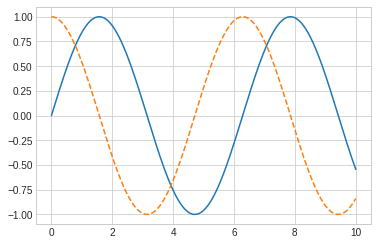

In [5]:
import numpy as np
x = np.linspace(0, 10, 1000)  #type array
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')


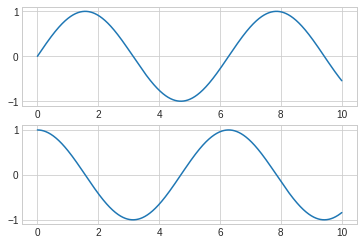

In [9]:
#two plotting style

#matlab style

#treating plt as one single instance for plotting
plt.figure()

plt.subplot(2, 1, 1) #(rows, columns, panel numbers)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

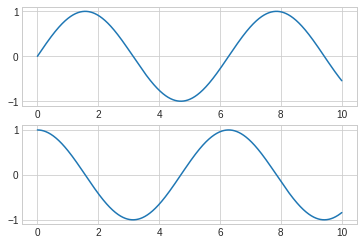

In [10]:
#OO style
#Object-oriented style
fig, ax = plt.subplots(2)  #notice the s here

#fig will be a global object that control
#things like size, other global properties

#ax will each object of the two subplot
#ax[0] is the first subplot
#ax[1] is the second subplot

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

### Line plots

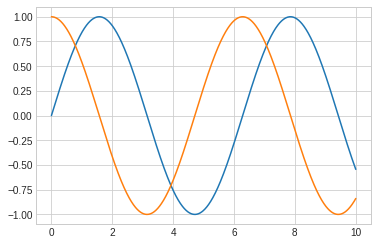

In [12]:
import numpy as np
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))


#### Colors of lines

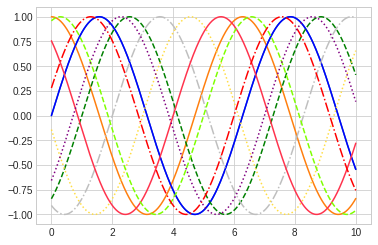

In [16]:
#matlab way 
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

#many color options
#many line options
plt.plot(x, np.sin(x-0), color='blue', linestyle='solid')
plt.plot(x, np.sin(x-1), color='g', linestyle='dashed')
plt.plot(x, np.sin(x-2), color='0.75', linestyle='dashdot') #grayscale between 0 and 1
plt.plot(x, np.sin(x-3), color='#FFDD44', linestyle='dotted') #RRGGBB
plt.plot(x, np.sin(x-4), color=(1.0, 0.2, 0.3), linestyle='-') #RGB tuple, values 0, to 1
plt.plot(x, np.sin(x-5), color='chartreuse', linestyle='--') #all html colors supported
plt.plot(x, np.sin(x-6), color='red', linestyle='-.') #all html colors supported
plt.plot(x, np.sin(x-7), color='purple', linestyle=':') #all html colors supported

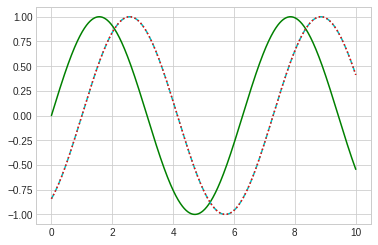

In [22]:
#combine line color
#plt.plot(x, y, 'color+line')
plt.plot(x, np.sin(x-0), 'g-')
plt.plot(x, np.sin(x-1), '--c')
plt.plot(x, np.sin(x-1), ':r')







(-1.5, 1.5)

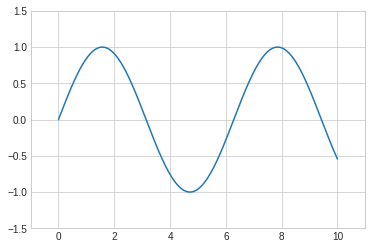

In [23]:
#set the limit of x and y
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)  #set_xlim
plt.ylim(-1.5, 1.5)

(-1.0, 11.0, -1.5, 1.5)

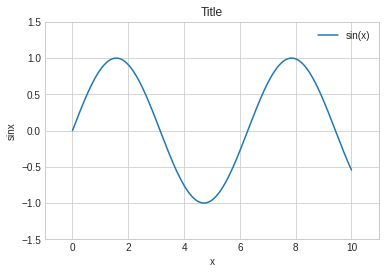

In [36]:
plt.rcParams.update({'font.size': 10})

plt.plot(x, np.sin(x), label='sin(x)')
plt.legend()
plt.ylabel("sinx")  #set_ylabel
plt.xlabel("x") #set_xlabel
plt.title("Title")
plt.axis([-1, 11, -1.5, 1.5])

[(-2.0, 2.0),
 Text(0, 0.5, 'sin(x)'),
 (0.0, 10.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'A super simple plot')]

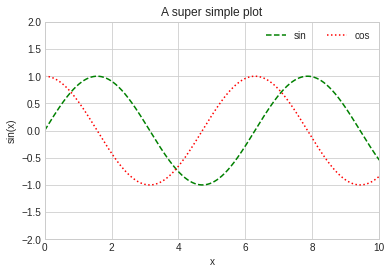

In [42]:
#object oriented
ax = plt.axes()
ax.plot(x, np.sin(x), '--g', label='sin')
ax.plot(x, np.cos(x), ':r', label='cos')
ax.legend(ncol=2, loc='best')
ax.set(xlim=(0, 10), ylim=(-2, 2),
      xlabel='x', ylabel='sin(x)',
      title='A super simple plot')

### Scatter plot

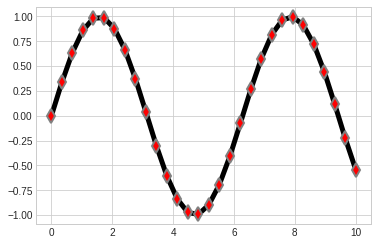

In [59]:
#plot with 'o'
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, '-dk', 
        markersize=10, linewidth=5,
        markerfacecolor='red',
        markeredgecolor='gray',
        markeredgewidth=2) #circle black

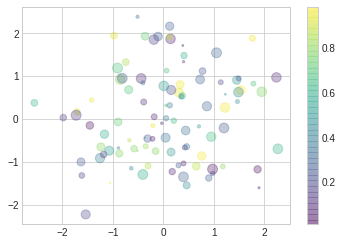

In [66]:
#.scatter

rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 100 * rng.rand(100) #numbers ranging from 0 to 100

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
           cmap='viridis')

plt.colorbar()

Text(0, 0.5, 'sepal width (cm)')

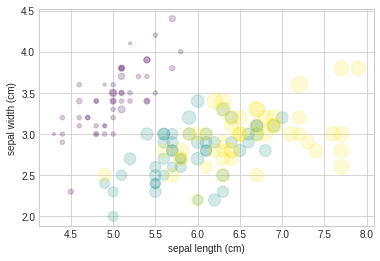

In [73]:
#iris data

from sklearn.datasets import load_iris
iris = load_iris()

features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
           s=100*features[3], c=iris.target, cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

<ErrorbarContainer object of 3 artists>

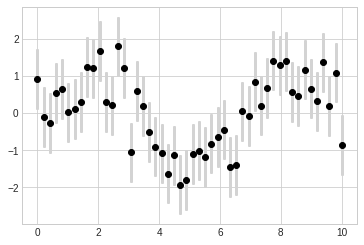

In [76]:
#error bars

x = np.linspace(0, 10, 50)
dy = 0.8 #i want my error bar delta to be 0.8
y = np.sin(x) + dy * np.random.randn(50)

#plt.plot + errorbar
plt.errorbar(x, y, yerr=dy, fmt='ok', ecolor='lightgray',
            elinewidth=3, capsize=1)

(5,)


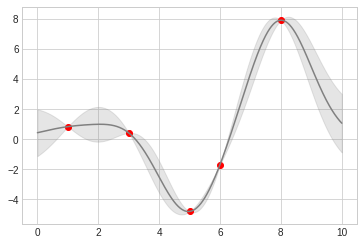

In [82]:
#continuous errors

from sklearn.gaussian_process import GaussianProcessRegressor as GP

#define the model and draw some data
f = lambda x: x * np.sin(x) #f(x) = x * np.sin(x)
x = np.array([1, 3, 5, 6, 8])  #training data
print(x.shape)
y = f(x)  #training target data

#Compute the gaussian process fit
gp = GP().fit(x[:, np.newaxis], y) #gp knows the distribution

#input
xfit = np.linspace(0, 10, 1000) #test data

yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 1.96 * sigma

plt.plot(x, y, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit+dyfit,
                color='gray', alpha=0.2)

#sklearn likes
#(number of samples, number of features)

#(5, ) -> (5, 1)
#reshape, newaxis

### Histograms

(array([ 2.,  2.,  1.,  2.,  4.,  5., 10., 10., 17., 24., 26., 38., 35.,
        42., 47., 57., 49., 66., 59., 61., 69., 59., 47., 64., 51., 29.,
        32., 19., 22., 16., 14.,  7.,  4.,  5.,  2.,  1.,  1.,  0.,  0.,
         1.]),
 array([-3.01158446, -2.85437329, -2.69716212, -2.53995095, -2.38273978,
        -2.22552861, -2.06831744, -1.91110627, -1.7538951 , -1.59668393,
        -1.43947276, -1.28226159, -1.12505042, -0.96783925, -0.81062808,
        -0.65341691, -0.49620574, -0.33899457, -0.1817834 , -0.02457223,
         0.13263894,  0.2898501 ,  0.44706127,  0.60427244,  0.76148361,
         0.91869478,  1.07590595,  1.23311712,  1.39032829,  1.54753946,
         1.70475063,  1.8619618 ,  2.01917297,  2.17638414,  2.33359531,
         2.49080648,  2.64801765,  2.80522882,  2.96243999,  3.11965116,
         3.27686233]),
 <a list of 40 Patch objects>)

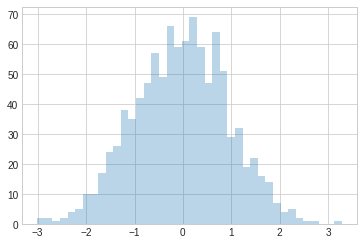

In [87]:
data = np.random.normal(0, 1, 1000)
#histograms support keyword arguments
kwargs = dict(alpha=0.3, bins=40)

plt.hist(data, **kwargs)

### Image

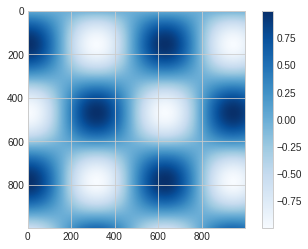

In [95]:
x = np.linspace(0, 10, 1000)
I = np.sin(x[:, np.newaxis]) * np.cos(x)

plt.imshow(I, cmap='Blues')

plt.colorbar()

### Multiple subplots

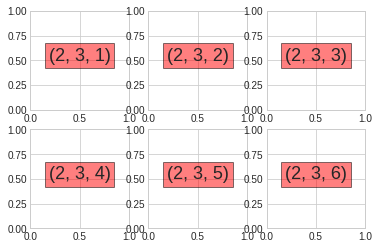

In [97]:
#matlab way

# plt.subplot(rows, columns, panels) #set the current plot to this

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, horizontalalignment='center',
            bbox=dict(facecolor='red', alpha=0.5))

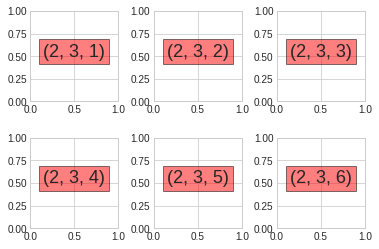

In [98]:
#2nd way - oo style
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i) #ax is now the instance of that subplot
    ax.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, horizontalalignment='center',
            bbox=dict(facecolor='red', alpha=0.5))

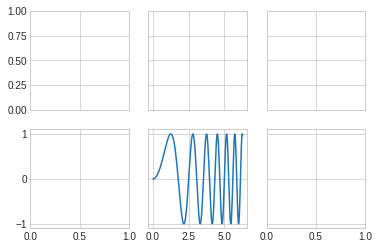

In [101]:
#3rd way
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
ax[1, 1].plot(x, y)

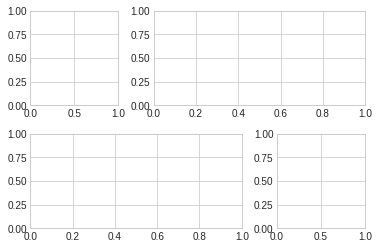

In [102]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [103]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

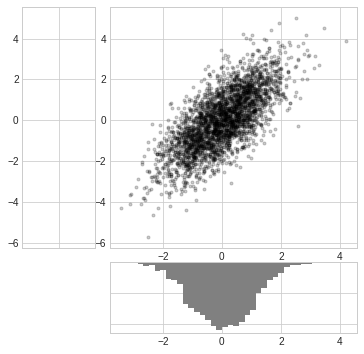

In [114]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, bins=40, orientation='vertical', color='gray')
x_hist.invert_yaxis()

In [115]:
#annotations
#3d plotting
#date tick labels
#tables
#gui
#animations

(5,)


Text(1, 4, 'I want to go dinner')

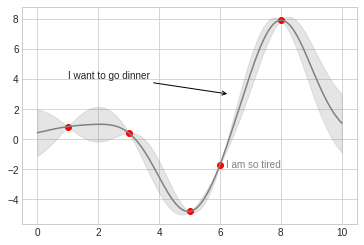

In [118]:
#annotations
#putting text on the plot

from sklearn.gaussian_process import GaussianProcessRegressor as GP

#define the model and draw some data
f = lambda x: x * np.sin(x) #f(x) = x * np.sin(x)
x = np.array([1, 3, 5, 6, 8])  #training data
print(x.shape)
y = f(x)  #training target data

#Compute the gaussian process fit
gp = GP().fit(x[:, np.newaxis], y) #gp knows the distribution

#input
xfit = np.linspace(0, 10, 1000) #test data

yfit, sigma = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 1.96 * sigma

plt.plot(x, y, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit+dyfit,
                color='gray', alpha=0.2)

style = dict(size = 10, color='gray')

plt.text(6.2, -1.9, "I am so tired", **style)

plt.annotate('I want to go dinner', xy=(6.3, 3), xytext=(1, 4),
            arrowprops=dict(arrowstyle="->"))

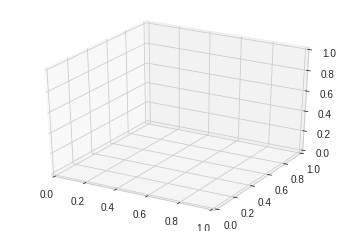

In [121]:
#3d plotting

from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.show()

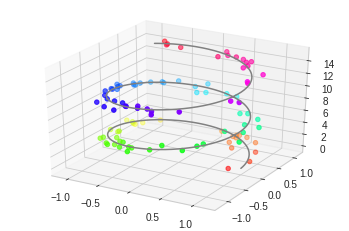

In [128]:
#3D line

fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)

ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)  #range 1 - 15
x_points = np.cos(z_points) + 0.1 * np.random.randn(100) 
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

In [133]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports color mapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    Parameters
    ----------
    X, Y, Z : 2d arrays
        Data values.
    
    rcount, ccount : int
        Maximum number of samples used in each direction.  If the input
        data is larger, it will be downsampled (by slicing) to these
        numbers of points.  Defaults to 50.
    
        .. versionadded:: 2.0
    
    rstride